# 背包问题
## 背包问题定义
1. 0-1背包问题：每个物品只能选一次，且每个物品只能选0个或者1个。
2. 多重背包问题：每个物品可以选多次。
3. 完全背包问题：每个物品可以选多次，但是每个物品可以选多次。
## 背包问题分类
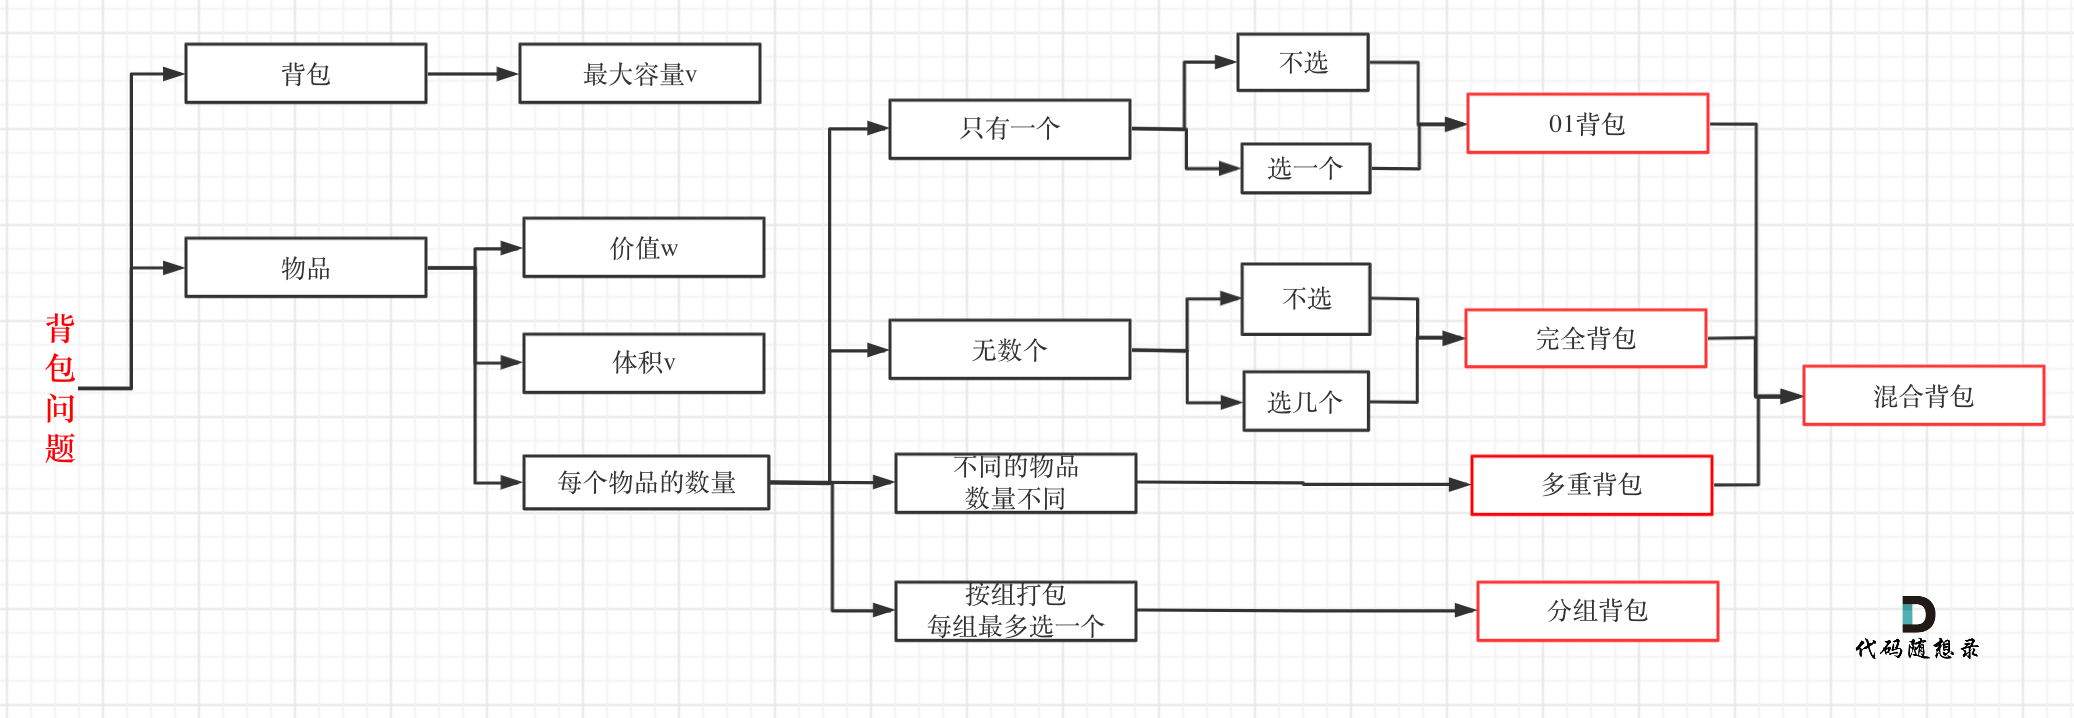

## 01背包问题
### 例题
**题目描述**  
小明是一位科学家，他需要参加一场重要的国际科学大会，以展示自己的最新研究成果。他需要带一些研究材料，但是他的行李箱空间有限。这些研究材料包括实验设备、文献资料和实验样本等等，它们各自占据不同的空间，并且具有不同的价值。 
小明的行李空间为 N，问小明应该如何抉择，才能携带最大价值的研究材料，每种研究材料只能选择一次，并且只有选与不选两种选择，不能进行切割。

**输入描述**  
第一行包含两个正整数，第一个整数 M 代表研究材料的种类，第二个正整数 N，代表小明的行李空间。

第二行包含 M 个正整数，代表每种研究材料的所占空间。 

第三行包含 M 个正整数，代表每种研究材料的价值。

**输出描述**  
输出一个整数，代表小明能够携带的研究材料的最大价值。
输入示例
6 1
2 2 3 1 5 2
2 3 1 5 4 3
**输出示例**  
5
**提示信息**  
小明能够携带 6 种研究材料，但是行李空间只有 1，而占用空间为 1 的研究材料价值为 5，所以最终答案输出 5。 

**数据范围：**  
1 <= N <= 5000
1 <= M <= 5000
研究材料占用空间和价值都小于等于 1000

#### 二维dp数组01背包
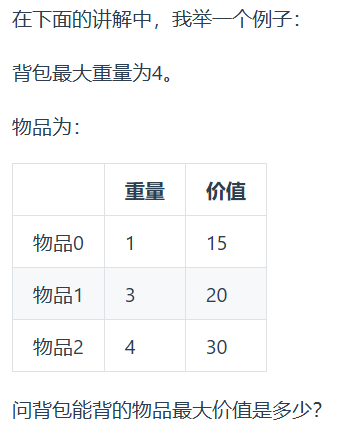
+ 明确dp数组的含义  
**即dp[i][j] 表示从下标为[0-i]的物品里任意取，放进容量为j的背包，价值总和最大是多少。**  
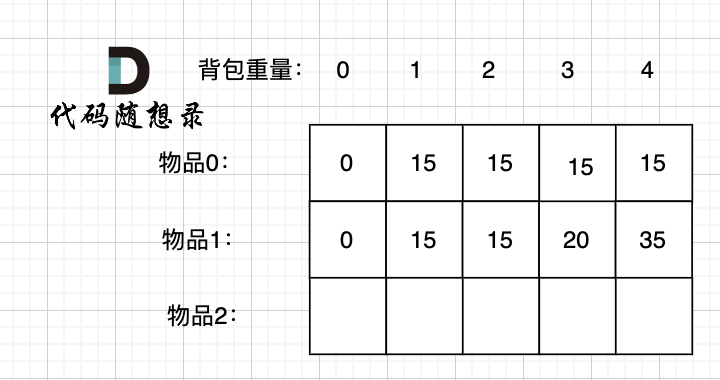
+ 确定递推公式  
`dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weight[i]] + value[i]);`

+ dp数组如何初始化  
+ 确定遍历顺序
+ 举例推导dp数组

In [ ]:
class Solution:
    def __init__(self, M, N, M_space, M_value):
        self.M = M
        self.N = N
        self.M_space = M_space
        self.M_value = M_value

    def bagProblem(self) -> int:
        # init
        dp = [[0 for _ in range(self.N + 1)] for _ in range(self.M)]
        for i in range(self.N + 1):
            if i >= self.M_space[0]:
                dp[0][i] = self.M_value[0]
        
        # dp
        # print(dp)
        for m in range(1, self.M):
            for n in range(1, self.N + 1):
                if n >= self.M_space[m]:
                    dp[m][n] = max(dp[m-1][n], self.M_value[m] + dp[m-1][n-self.M_space[m]])
                else:
                    dp[m][n] = dp[m-1][n]
            # print(dp)
        return dp[-1][-1]
    
    def bagProblem_scrollArr(self) -> int:
        # init
        dp = [0 for _ in range(self.N + 1)]
        for i in range(self.N + 1):
            if self.M_space[0] <= i:
                dp[i] = self.M_value[0]
        
        # dp
        for m in range(1, self.M):
            cur_value = self.M_value[m]
            cur_space = self.M_space[m]
            for n in range(self.N, 0 , -1):
                if n >= cur_space:
                    dp[n] = max(dp[n], cur_value + dp[n - cur_space])
        
        return dp[-1]


M_N = input().strip()
M_space = input().strip()
M_value = input().strip()

M, N = int(M_N.split()[0]), int(M_N.split()[1])

M_space = [int(i) for i in M_space.split()]
M_value = [int(i) for i in M_value.split()]

print(Solution(M, N, M_space, M_value).bagProblem_scrollArr())